#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

In [35]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [36]:
# Geopandas 

In [37]:
Trees_RH = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Trees_Closest.shp')

In [38]:
#Changing CRS 
Trees_RH_4326= Trees_RH.to_crs(epsg=4326)

In [39]:
Trees_RH.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'geometry'],
      dtype='object')

In [40]:
Trees_RH.head(3)

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,geometry
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,3.37,4.183,7703.11,-999,1,1,1,9.32195,0.554779,POINT (535829.680 61322.481)
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,3.37,4.183,7703.11,-999,1,1,1,9.32195,0.554779,POINT (535827.853 61327.054)
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,3.37,4.183,7703.11,-999,1,1,1,9.32195,0.554779,POINT (535829.889 61327.977)


##### Finding AGB

Aboveground Biomass(AGB) is the amount of living matter above the ground. The foumulat bellow is from "Comparison of Small- and Large-Footprint Lidar Characterization of Tropical Forest Aboveground Structure and Biomass: A Case Study From Central Gabon (Silva, et al. 2018)" in it they use AGB (kg) = 0.0673 × (ρ × dbh2 × ht)0.976 they which is Chave formula (Chave , et al. 2015)

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3.
The total AGB at plot level was then obtained by summing
individual stem biomass estimates and converting it to Mg·ha−1.


Returning to out formula we need the find the ρ which is densentity. The can be found using the 

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3. The total AGB at plot level was then obtained by summing individual stem biomass estimates and converting it to Mg·ha−1.

The wood density came from the following two papers 


[1] J. Chave, D. A. Coomes, S. Jansen, S. L. Lewis, N. G. Swenson,
and A. E. Zanne, “Towards a worldwide wood economics spectrum,”
Ecol. Lett., vol. 12, no. 4, pp. 351–366, 2009. [Online]. Available:
https://doi.org/10.1111/j.1461-0248.2009.01285.x
[42] A. E. Zanne et al., Data from: Towards a Worldwide Wood Economics Spectrum, Dryad Digital Repository, 2009. [Online]. Available:
https://doi.org/10.5061/dryad.234

This is bringing in the would density database for the ρ

The would Density in data set is wsg field and it comes from the data set listed above 

I will be going foward with 0.228 because that is the median value 

AGB (kg) = 0.0673 × (0.228 × dbh^2 × ht)^0.976


the next step is to find the hieght. to find the Height I will be using the LVIS for in read that is found next to the 

In [41]:
#LVISshot = LVIS[(LVIS.LFID == 1657455174)]

In [42]:
Trees_RH['RA_AGB_RHh_t_mod'] = (0.0673*((Trees_RH.wsg)*(Trees_RH.a_stem)*(Trees_RH.h_t_mod)**0.976))

In [43]:
Trees_RH.head

<bound method NDFrame.head of       Join_Count     D_LVIS  TARGET_FID    plot  subplot   tree_date  \
0              1   6.424267           1  NASA01        1  2016-02-03   
1              1   7.669181           2  NASA01        1  2016-02-03   
2              1   9.654939           3  NASA01        1  2016-02-03   
3              1  10.448032           4  NASA01        1  2016-02-03   
4              1   7.489962           5  NASA01        1  2016-02-03   
...          ...        ...         ...     ...      ...         ...   
6627           1   4.794827        6628  NASA23       14  2016-02-21   
6628           1   4.721321        6629  NASA23       14  2016-02-21   
6629           1   3.696850        6630  NASA23       14  2016-02-21   
6630           1   0.323598        6631  NASA23       14  2016-02-21   
6631           1   3.057894        6632  NASA23       14  2016-02-21   

               family                species       wsg  tree  ...  INCIDENTAN  \
0       Euphorbiaceae   

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

RH100

In [44]:
Trees_RH['RA_AGB_RHh_RH100'] = (0.0673*((Trees_RH.wsg)*(Trees_RH.a_stem)*(Trees_RH.RH100)**0.976))

RH75

In [45]:
Trees_RH['RA_AGB_RH75'] = (0.0673*((Trees_RH.wsg)*(Trees_RH.a_stem)*(Trees_RH.RH75)**0.976))

RH50

In [46]:
Trees_RH['RA_AGB_RH50'] = (0.0673*((Trees_RH.wsg)*(Trees_RH.a_stem)*(Trees_RH.RH50)**0.976))

RH25

In [47]:
Trees_RH['RA_AGB_RH125'] = (0.0673*((Trees_RH.wsg)*(Trees_RH.a_stem)*(Trees_RH.RH25)**0.976))

In [48]:
Trees_RH

,Join_Count,D_LVIS,TARGET_FID,plot,subplot,tree_date,family,species,wsg,tree,...,CHANNEL_ZG,CHANNEL_RH,POINT_X_1,POINT_Y_1,geometry,RA_AGB_RHh_t_mod,RA_AGB_RHh_RH100,RA_AGB_RH75,RA_AGB_RH50,RA_AGB_RH125
0,1,6.424267,1,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6501,...,1,1,9.321950,0.554779,POINT (535829.680 61322.481),0.003277,0.003906,0.002116,0.001458,0.000628
1,1,7.669181,2,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6502,...,1,1,9.321950,0.554779,POINT (535827.853 61327.054),0.002234,0.002870,0.001555,0.001071,0.000461
2,1,9.654939,3,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6503,...,1,1,9.321950,0.554779,POINT (535829.889 61327.977),0.002636,0.003278,0.001776,0.001223,0.000527
3,1,10.448032,4,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6504,...,1,1,9.321950,0.554779,POINT (535829.928 61328.976),0.003558,0.004173,0.002261,0.001557,0.000671
4,1,7.489962,5,NASA01,1,2016-02-03,Euphorbiaceae,Macaranga sp.,0.381789,6505,...,1,1,9.321950,0.554779,POINT (535828.814 61326.016),0.002636,0.003278,0.001776,0.001223,0.000527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6627,1,4.794827,6628,NASA23,14,2016-02-21,NA,NA,0.534143,3903,...,1,1,9.316560,0.545585,POINT (535219.803 60301.826),0.211827,0.060565,0.007218,NaN,NaN
6628,1,4.721321,6629,NASA23,14,2016-02-21,NA,NA,0.534143,3904,...,1,1,9.316476,0.545584,POINT (535218.832 60302.614),0.230236,0.063456,0.007718,NaN,NaN
6629,1,3.696850,6630,NASA23,14,2016-02-21,Myristicaceae,Pycnanthus angolensis,0.408900,3905,...,1,1,9.316476,0.545584,POINT (535217.843 60302.901),0.008269,0.004133,0.000503,NaN,NaN
6630,1,0.323598,6631,NASA23,14,2016-02-21,Melastomataceae,Dichaetanthera sp.,0.609414,3906,...,1,1,9.316560,0.545585,POINT (535223.895 60304.172),0.004601,0.002844,0.000339,NaN,NaN


#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

In [49]:
#https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html

In [50]:
#Trees_in_subplots13_22csv = Trees_in_subplots13_22.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_in_subplots13_22.csv')

In [51]:
#LVIS_in_subplots13_22csv = LVIS_in_subplots13_22.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS_in_subplots13_22.csv')

In [52]:
#Trees_in_subplots13_22 = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\Trees_in_subplots13_22.csv')

In [53]:
#LVIS_in_subplots13_22 = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS_in_subplots13_22.csv')

In [54]:
Trees_in_subplots13_22

,Unnamed: 0,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357294529431815 0.5768071904896547)
1,1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357296548023385 0.5766215152611616)
2,2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357296548023385 0.5766215152611616)
3,3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357293152482423 0.5765311084359217)
4,4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357293152482423 0.5765311084359217)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357544609700618 0.5765215360659021)
260,260,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357518006941985 0.5765316026764638)
261,261,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.357532157207384 0.5765491713030634)
262,262,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753249658209 0.5765582120758153)


In [55]:
LVIS_in_subplots13_22

,Unnamed: 0,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,0,1.657455e+09,9420783.0,45738.170,9.357683,0.576376,26.65,-999.0,-999.0,-999.0,...,165.41,132.91,205.12,270.0,1080.0,5.44,21.76,0.51,33.89,POINT (9.357683000000065 0.5763760000000389)
1,1,1.657455e+09,9420784.0,45738.171,9.357687,0.576470,26.85,-999.0,-999.0,-999.0,...,165.41,132.91,205.12,270.0,1080.0,5.44,21.76,0.51,33.89,POINT (9.357687000000055 0.5764700000000289)
2,2,1.657455e+09,9420785.0,45738.172,9.357690,0.576564,26.90,-999.0,-999.0,-999.0,...,165.41,132.91,205.12,270.0,1080.0,5.44,21.76,0.51,33.89,POINT (9.357690000000048 0.5765640000000758)
3,3,1.657455e+09,9420786.0,45738.173,9.357693,0.576658,26.61,-999.0,-999.0,-999.0,...,165.41,132.91,205.12,270.0,1080.0,5.44,21.76,0.51,33.89,POINT (9.35769300000004 0.5766580000000658)
4,4,1.657455e+09,9420787.0,45738.174,9.357697,0.576752,27.30,-999.0,-999.0,-999.0,...,165.41,132.91,205.12,270.0,1080.0,5.44,21.76,0.51,33.89,POINT (9.35769700000003 0.5767520000000559)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,823,1.657455e+09,9911421.0,46228.812,9.330292,0.546591,25.30,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (9.330292000000043 0.5465910000000349)
824,824,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,24.39,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (9.33029300000004 0.5464960000000474)
825,825,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,26.94,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (9.330295000000035 0.5463080000000673)
826,826,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,24.59,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (9.330296000000033 0.5462130000000229)


In [56]:
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html#:~:text=%20Filter%20pandas%20dataframe%20by%20column%20value%20,same%20output.%20It%27s%20just%20a%20different...%20More%20

In [63]:
Trees_RH.columns

Index(['Join_Count', 'D_LVIS', 'TARGET_FID', 'plot', 'subplot', 'tree_date',
       'family', 'species', 'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status',
       'allom_key', 'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht',
       'm_agb', 'POINT_X', 'POINT_Y', 'LFID', 'SHOTNUMBER', 'TIME', 'GLON',
       'GLAT', 'ZG', 'HLON', 'HLAT', 'ZH', 'TLON', 'TLAT', 'ZT', 'RH10',
       'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45', 'RH50', 'RH55',
       'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90', 'RH95', 'RH96',
       'RH97', 'RH98', 'RH99', 'RH100', 'AZIMUTH', 'INCIDENTAN', 'RANGE',
       'COMPLEXITY', 'CHANNEL_L1', 'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X_1',
       'POINT_Y_1', 'geometry', 'RA_AGB_RHh_t_mod', 'RA_AGB_RHh_RH100',
       'RA_AGB_RH75', 'RA_AGB_RH50', 'RA_AGB_RH125'],
      dtype='object')

In [ ]:
#TreesRH13_22.columns

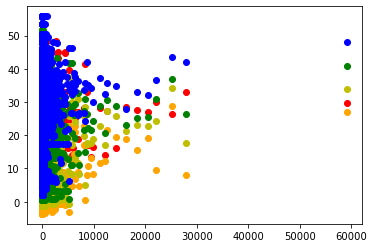

In [64]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH25,color='orange') 
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH50,color='y')
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH75,color='g')
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH100,color='b')
matplotlib.pyplot.show()

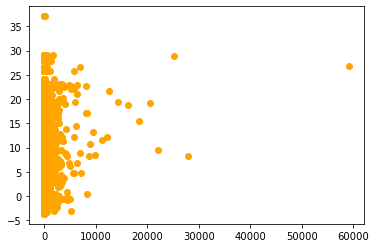

In [65]:
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH25,color='orange') 

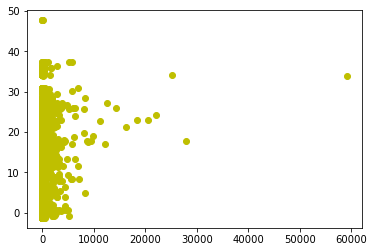

In [66]:
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH50,color='y')

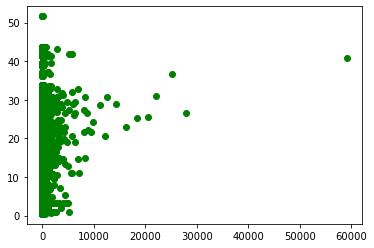

In [67]:
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH75,color='g')

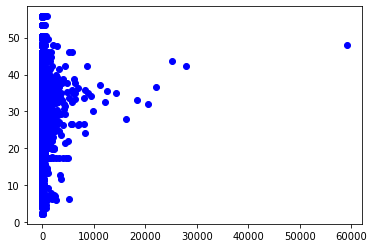

In [68]:
matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.RH100,color='b')

In [ ]:
#This is look at Plot13

In [69]:
Trees_RH13 = Trees_RH[(Trees_RH['plot'] == 'NASA13')]

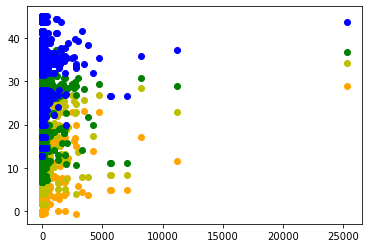

In [70]:
#matplotlib.pyplot.scatter(Trees_RH.m_agb,Trees_RH.ZG,color='r') 
matplotlib.pyplot.scatter(Trees_RH13.m_agb,Trees_RH13.RH25,color='orange') 
matplotlib.pyplot.scatter(Trees_RH13.m_agb,Trees_RH13.RH50,color='y')
matplotlib.pyplot.scatter(Trees_RH13.m_agb,Trees_RH13.RH75,color='g')
matplotlib.pyplot.scatter(Trees_RH13.m_agb,Trees_RH13.RH100,color='b')
matplotlib.pyplot.show()

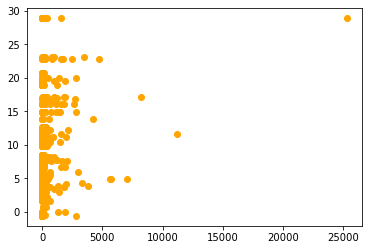

In [71]:
matplotlib.pyplot.scatter(Trees_RH13.m_agb,Trees_RH13.RH25,color='orange')

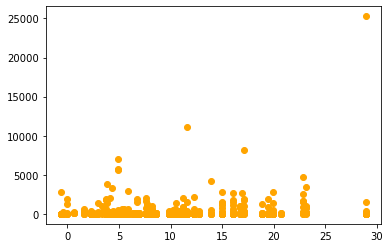